# **Machine Learning : cours applicatif**


## 1.  Introduction

   L'apprentissage machine est une branche de l'IA qui permet à une machine d'apprendre à partir des données sans être explicitement programmée.
   
   Son but est de contruire des modèles capables de généraliser (bien prédire sur des données non vues).

   Il existe trois types d'apprentissage:


*   **Supervisé** : Le modèle apprend à partir des **données étiquetées**. En effet l'objectif de la machine est d'apprendre les cibles correctes pour de nouvelles observations.


*   **Non-supervisé** : Le modèle décrouvre des **structures cachées** dans des données **sans étiquette**(clustering, réduction de dimension). L'objectif de la machine est donc de créer un modèle d'ensemble d'observations, un partitionnement des données.


*   **Par renforcement** : Le modèle **interagit avec un environnement**, apprend par essais/erreurs (récompense/punitions).

###a) Apprentissage supervisé
Il comprend *deux grandes cibles* :

*   **la régression** dont la cible est un nombre réel.
Exemple: prédire le prix d'une maison

*   **la classification** qui consiste à prédire une étiquette catégorique.
Exemple: reconnaissance de caractères dans une image


Cet apprentissage dispose de *trois grandes approches* telles que:


1.   **Approche générative** : modéliser P(X|Y) et P(Y) puis appliquer Bayes.
Exemple : apprentissage Bayésien, Modèle de Markov Caché.
2.   **Approche discriminante** : modéliser directement P(X|Y) ou la fonction de décision.
Exemple : analyse linéaire discriminante, machine à vecteur support (SVM).
3.   **Approche par exemplification**
Exemple : K-plus-proche-voisin.


En résumé, Machine Learning = modèles + données + évaluation (trin/test/cv).



##2.   **Régression**
2.1. **Régression polynomiale en D = 1**

L'objectif est de prédire y (y un réel) en fonction de x (observation) i.e y = f(x) où f est notre modèle que nous devons apprendre à
 partir de l’ensemble d’entraînement :

 Dtr = {(x1, y1), ..., (xn, yn)}

La méthode utilisée consiste à transformer la feature (PolynomialFeatures) puis régression linéaire (moindres carrés) ou régularisée.

**Application 2.1** : générer des données synthétiques non-linéaires (y = sin(x) + bruit), faire une régression polynomiale de degré 3 et évaluer MSE sur test.



In [ ]:
# régression polynomiale (1D)
import numpy as np
"""
• PolynomialFeatures sert à transformer une variable 1D (ex: x)
en caractéristiques polynomiales (ex: 1, X², X³, ...)
• LinearRegression est une régression linéaire qui sera appliqué
sur les caractéristiques polynomiales.
• mean_squared_error calcule le carré de l'erreur moyenne (MSE).
• train_test_split divise les données en ensembles d'entraînement et de test.
• np.random.RandomState est utilisé pour générer des nombres aléatoires.
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# données synthétiques
rng = np.random.RandomState(0)
X = rng.uniform(-3, 3, size=100)[:, None]
# génère 100 valeurs aléatoires entre -3 et -3
# [:, None] tranforme le vecteur en matrice colonne (shape = (100,1)) car scikit-learn exige un tableau 2D
y = np.sin(X).ravel() + rng.normal(0, 0.02, size=X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# random_state=1 pour garantir la même division à chaque exécution

# transformer polynôme degré 3
poly = PolynomialFeatures(degree=3) # on obtient automatiqmt [1,x,x²,x³]
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entraînement du modèle
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
print('MSE (degree 3): ', mean_squared_error(y_test, y_pred))

"""
Mesure l'erreur quadratique moyenne (MSE) entre les valeurs prédites y_pred et les valeurs réelles y_test.
plus le MSE est petit, plus le modèle est performant.
"""

# afficher quelques prédictions
for i in range(5):
  print(f'x={X_test[i,0]:.3f}, y_true={y_test[i]:.3f}, y_pred={y_pred[i]:.3f}')



MSE (degree 3):  0.003602490516492742
x=-1.092, y_true=-0.898, y_pred=-0.807
x=0.400, y_true=0.365, y_pred=0.361
x=0.411, y_true=0.437, y_pred=0.370
x=-0.514, y_true=-0.453, y_pred=-0.415
x=1.298, y_true=0.950, y_pred=0.933


2.2. Régression polynomiale en D > 1


*   Même principe : créer features polynomiales et interactions entre variables.
*   Attention : explosion du nombre de features, utiliser la régularisation

Application 2.2 : appliquer PolynomialFeatures(degree=2) sur un dataset de régression et comparer LinearRegression vs Ridge (alpha=1.0)



In [ ]:
# régression multivariée polynomiale (degrée 2)
from sklearn.linear_model import LinearRegression, Ridge
"""
• Ridge : régression linéaire régularisée L2 qui réduit l'overfithing
• StandardScaler : normalise les données (moyenne = 0, écart-type = 1),
ce qui est nécessaire pour les modèles polynomiaux
• make_regression : génère un dataset synthétique de régression
"""
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

"""
générer un dataset de
 400 échantillons,
 5 variables explicatives,
 bruit = 10 pour simuler des datas réalistes
"""
X, y = make_regression(n_samples=400, n_features=5, noise=10, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

"""
• Création d'un générateur de caractéristiq polynomiales quadratique (d=2)
• Génère les nouvelles var polynomiales pur le train et le test
Au final, on passe de 5 features à puls de 20 features
"""
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_s)
X_test_poly = poly.transform(X_test_s)

"""
Entraîne une régression linéaire simple sur les données polynomiales standardisées
Mais cette version risque l'overfitting car bcp de var poly ont été ajoutées.
"""
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

"""
Entraîne une régression linéaire Ridge, qui ajoute une régularisation L2.
Celle-ci aide les coéf trop élevés → réduit l'overfitting.
"""
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

print('MSE (LinearRegression): ', mean_squared_error(y_test, lr.predict(X_test_poly)))
print('MSE (Ridge): ', mean_squared_error(y_test, ridge.predict(X_test_poly)))


MSE (LinearRegression):  107.51878448827306
MSE (Ridge):  108.39183426306495




##3.  **Approche générative**

3.1. **Décision Bayésienne (Naive Bayes)**

  **Son principe** est de modéliser P(X|Y) et P(Y). NAive Bayes suppose l'indépendance conditionnelle des features.

  *Application 3.1: * appliquer GaussianNB sur le dataset Iris et mesurer l'exactitude (accuracy).



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# GaussianNB est le modèle Naive Bayes Gaussien, utilisé pour les données continues
from sklearn.metrics import accuracy_score
# accuracy_score calcule le % de bonnes prédictions.
from sklearn import datasets

# charger le dataset Iris
iris = datasets.load_iris()
print(dir(iris))
print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape)
print(iris.target.shape)
print(iris.target)
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Prédictions: ', y_pred)
print('Vrais résultats: ', y_test)

print('Exactitude GaussianNB sur Iris est : ', accuracy_score(y_test, y_pred))
"""
accuracy = (nbre de bonnes prédictions) / nbre total
elle affiche la performance du modèle sur les données de test.
"""


['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Prédictions:  [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Vrais résultats:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Exactitude GaussianNB sur Iris est :  0.9666666666666667


3.2. **Modèles séquentiels**

*Application 3.2 :* on considère 3 états, simuler quelques étapes et estimer la probabilité d'être dans un état donné après t étapes.

In [ ]:
# simulation d'une chaine de Mackov simple
import numpy as np
P = np.array([[0.8, 0.1, 0.1],
              [0.2, 0.7, 0.1],
              [0.1, 0.2, 0.7]])
# état initial à t = 0
pi = np.array([1.0, 0.0, 0.0])

def step(pi, P, t=1):
  return pi.dot(np.linalg.matrix_power(P, t))

for t in [1,2,5,10]:
  p_t = step(pi, P, t)
  print(f'Probabilité après {t} étapes: {p_t}')

Probabilité après 1 étapes: [0.8 0.1 0.1]
Probabilité après 2 étapes: [0.67 0.17 0.16]
Probabilité après 5 étapes: [0.49744 0.272   0.23056]
Probabilité après 10 étapes: [0.44342065 0.30809101 0.24848835]




##4.   **Approche discriminante**

4.1 **Arbre de décision**

Les arbres segmentent l'espace par questions. Elles sont faciles à interpréter.

*Application 4.1* : construire un DecisionTreeClassifier sur Iris et afficher la profondeur et l'accuracy.




In [ ]:
# abre de décision sur Iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data; y = iris.target
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_tr, y_tr)

print('Profondeur : ', clf.get_depth())
print("L'exactitude d'entrainement : ", accuracy_score(y_tr, clf.predict(X_tr)))
print("L'exactitude de test : ", accuracy_score(y_te, clf.predict(X_te)))

4.2. **Frontière / surface de décision**

Visualiser la frontière en 2D aide à comprendre le comportement d'un modèle.

*Application 4.2* : générer un dataset 2D (make_moons), entrainer SVM linéaire et SVM RBF, tracer la frontière.

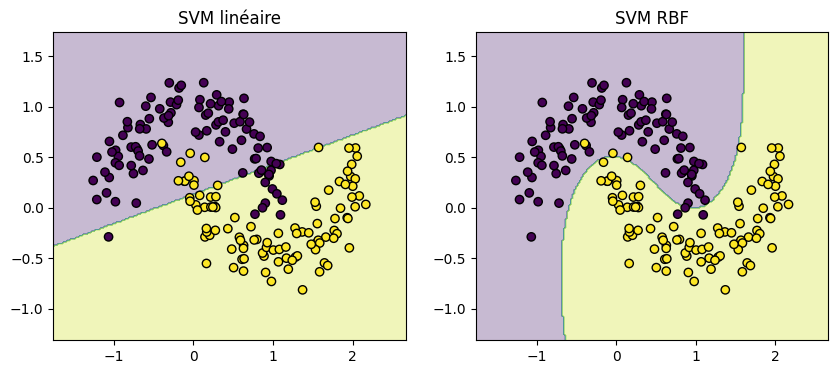

In [ ]:
# SVM sur make_moons
from sklearn.svm import SVC
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.15, random_state=0)
clf_lin = SVC(kernel='linear', C=1).fit(X, y)
clf_rbf = SVC(kernel='rbf', gamma=1.0).fit(X, y)

#
def plot_decision(clf, X, y, ax, title=''):
  xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
                       np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200))
  z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)
  ax.contourf(xx, yy, z, alpha=0.3)
  ax.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
  ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_decision(clf_lin, X, y, axes[0], 'SVM linéaire')
plot_decision(clf_rbf, X, y, axes[1], 'SVM RBF')
plt.show()


4.3. **Analyse Linéaire Discriminante (LDA)**

Elle suppose des classes gaussiennes avec même matrice de covariance, conduisant à une séparation linéaire.

*Application 4.3* : utiliser LinearDiscriminantAnalysis sur Iris et comparer l'exactitude avec LogisticRegression

In [ ]:
# LDA vs LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data; y = iris.target
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)

lba = LinearDiscriminantAnalysis().fit(X_tr, y_tr)
lr = LogisticRegression(max_iter=200).fit(X_tr, y_tr)

d= lba.predict(X_te)
r= lr.predict(X_te)
b = False
for i in range(len(d)):
  if d[i] != r[i]:
    b = True
    break
if b:
  print('Les prédictions sont différentes')
else:
  print('Les prédictions sont identiques')
print('Exactitude LDA : ', accuracy_score(y_te, lba.predict(X_te)))
print('Exactitude LogisticRegression : ', accuracy_score(y_te, lr.predict(X_te)))


Les prédictions sont identiques
Exactitude LDA :  1.0
Exactitude LogisticRegression :  1.0


4.4. **Machine à Vecteurs Supports (SVM)**

 Étant un algorithme de ML supervisé, le SVM est utilisé pour :

*  la **classification** (binaire * ou multi-classes)
*   **parfois régression** (SVR)

Son **idée principale** est de trouver la **meilleure frontière de séparation** entre deux classes.

Parmi toutes les frontières possibles, le SVM choisit celle **maximise la marge** qui désigne la distance entre l'hyperplan et les points les plus proches de chaque classe. Ces points critiques s'appelant **vecteur de support** sont les plus difficiles à séparer → collés à la frontière.


*Application 4.4* : SVM pour classifier digits (0 vs 1) en utilisant sklearn.datasets.load_digits

In [ ]:
# SVM sur digits
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = load_digits()
mask = (digits.target == 0) | (digits.target == 1)
X = digits.images[mask].reshape(-1, 64)
y = digits.target[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Exactitude linear : ', accuracy_score(y_test, y_pred))

print("-"*100)
clf = SVC(kernel='rbf', gamma=0.001).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Exactitude rbf : ', accuracy_score(y_test, y_pred))

Exactitude linear :  1.0
----------------------------------------------------------------------------------------------------
Exactitude rbf :  1.0


4.5. **Réseaux de neurones artificiels**

Un ANN apprennent des représentations via couches successives; entraînement par backprop + descente de gradient.est un modèle inspiré du cerveau humain. Il est constitué :


*   **Neurones** : ce sont de petites unités de calcul qui reçoivent des entrées pondérées des poids dont on ajoute un biais et on applique une fonction d'activation avant d'envoyer le resultat au neurone suivant.

*   **Couches** : un ANN contient généralement une


1.   une couche d'entrée (reçoit les données)
2.   une ou plusieurs couches cachées (apprennent les relations complexes)
3.   Lune couche de sortie (donne la prédiction)

*   **Apprentissage** : le réseau apprend en ajustant ses **poids** et **biais** pour réduire son erreur.
Il utilise:

  • la propagation avant (calcul prédiction → erreur)

  • la rétropropagation : ajutste les poids via descente de gradient ou Adam



Les **avantages** des ANN résident dans leur capacité d'apprendre des relations complexes telles que : la reconnaissance d'images, la classification, la prédiction, le NPL, etc ...


*Application 4.5* : entraîner un petit réseau (MLPClassifier) sur digits et mesurer l'exactitude.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = load_digits()  # charge un dataset d'images 8*8 de chiffre écrits à la main
X = digits.data # images aplaties en vecteur de taille 64
y = digits.target # chiffre correct (0-9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

"""
création et entraînement du réseau de neurones
on a 64 entrées → 64 neurones cachés → 10 neurones en sortie (0-9)
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=500, random_state=0).fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print('Exactitude : ', accuracy_score(y_test, y_pred))

Exactitude :  0.975
